<a href="https://colab.research.google.com/github/ishancoderr/Neural-networks/blob/main/RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [68]:

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [69]:
url='https://raw.githubusercontent.com/ishancoderr/Neural-networks/main/Google_Stock_Price_Train.csv'
dataset_train=pd.read_csv(url)
training_set=dataset_train.iloc[:,1:2].values


In [70]:
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler(feature_range=(0,1))
training_set_scale=sc.fit_transform(training_set)


**Creating Data Stucture for RNN**

In [71]:
x_train=[]
y_train=[]
for i in range(60,1258):
  x_train.append(training_set[i-60:i,0])
  y_train.append(training_set[i,0])
x_train,y_train =np.array(x_train),np.array(y_train)  

In [72]:
x_train =np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))

**building the RNN**

In [73]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [74]:
regressor=Sequential()

**Adding the first LSTM layer and some Dropout regularisation**

In [75]:
regressor.add(LSTM(units= 50,return_sequences=True,input_shape =(x_train.shape[1],1)))
regressor.add(Dropout(0.2))

In [76]:
regressor.add(LSTM(units=50,return_sequences=True))
regressor.add(Dropout(0.2))

In [77]:
regressor.add(LSTM(units=50,return_sequences=True))
regressor.add(Dropout(0.2))

In [78]:
regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))

In [79]:
regressor.add(Dense(units=1))

In [80]:
regressor.compile(optimizer='adam',loss='mean_squared_error')

In [81]:
regressor.fit(x_train,y_train,epochs=100,batch_size=32)

Epoch 1/100
38/38 [==============================] - 9s 99ms/step - loss: 311670.8790
Epoch 2/100
38/38 [==============================] - 4s 106ms/step - loss: 302400.2692
Epoch 3/100
38/38 [==============================] - 4s 104ms/step - loss: 304670.5817
Epoch 4/100
38/38 [==============================] - 4s 105ms/step - loss: 301871.7228
Epoch 5/100
38/38 [==============================] - 4s 104ms/step - loss: 292575.1426
Epoch 6/100
38/38 [==============================] - 4s 105ms/step - loss: 294472.2540
Epoch 7/100
38/38 [==============================] - 4s 107ms/step - loss: 301394.0633
Epoch 8/100
38/38 [==============================] - 4s 104ms/step - loss: 294280.4054
Epoch 9/100
38/38 [==============================] - 4s 105ms/step - loss: 296714.8341
Epoch 10/100
38/38 [==============================] - 4s 105ms/step - loss: 288704.3373
Epoch 11/100
38/38 [==============================] - 4s 105ms/step - loss: 292383.7292
Epoch 12/100
38/38 [======================

In [82]:
url1='https://raw.githubusercontent.com/ishancoderr/Neural-networks/main/Google_Stock_Price_Test.csv'
dataset_test=pd.read_csv(url1)
real_stock_price=dataset_test.iloc[:,1:2].values

In [83]:
dataset_total =pd.concat((dataset_train['Open'],dataset_test['Open']),axis = 0)
inputs = dataset_total[len(dataset_total)-len(dataset_test)-60:].values
inputs=inputs.reshape(-1,1)
inputs=sc.transform(inputs)

In [84]:
x_test=[]
y_test=[]
for i in range(60,1258):
  x_test.append(training_set[i-60:i,0])
x_test=np.array(x_test)
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))
predicted_stock_price=regressor.predict(x_test)
predicted_stock_price=sc.inverse_transform(predicted_stock_price)

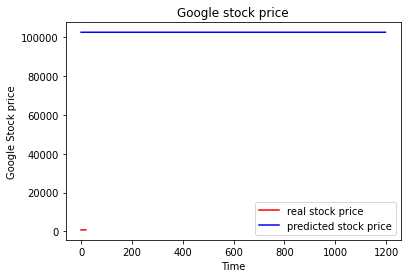

In [85]:
plt.plot(real_stock_price,color='red',label='real stock price')
plt.plot(predicted_stock_price,color='blue',label='predicted stock price')
plt.title('Google stock price')
plt.xlabel('Time')
plt.ylabel('Google Stock price')
plt.legend()
plt.show()